<a href="https://colab.research.google.com/github/AmarHasecic/Machine-Learning-Project/blob/main/ProjektniZadatak1_MU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mašinsko učenje - Projektni zadaci

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Zadatak 1**

###1.1. Analizirati dobijeni set podataka sa kreditnim informacijama– dimenzije, broj i namjenu varijabli.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/MU/creditscore_dataset.csv')

<ipython-input-156-d5e7e256391b>:1: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/My Drive/MU/creditscore_dataset.csv')


In [ ]:
df.shape

(100022, 30)

In [ ]:
numOfVariables = df.shape[1]
numOfVariables

30

In [ ]:
df

Unnamed: 0.2  Unnamed: 0  Unnamed: 0.1       ID Customer_ID     Month  \
0                  0           0             0   0x1602   CUS_0xd40   January   
1                  1           1             1   0x1603   CUS_0xd40  February   
2                  2           2             2   0x1604   CUS_0xd40         3   
3                  3           3             3   0x1605   CUS_0xd40     April   
4                  4           4             4   0x1606   CUS_0xd40       May   
...              ...         ...           ...      ...         ...       ...   
100017        100017       99995         99995  0x25fe9  CUS_0x942c     April   
100018        100018       99996         99996  0x25fea  CUS_0x942c       May   
100019        100019       99997         99997  0x25feb  CUS_0x942c         6   
100020        100020       99998         99998  0x25fec  CUS_0x942c      July   
100021        100021       99999         99999  0x25fed  CUS_0x942c         8   

              Name_and_Age          SSN Occupation Annual_Income  ...  \
0         Aaron Maashoh,23  821-00-0265  Scientist      19114.12  ...   
1         Aaron Maashoh,23  821-00-0265  Scientist      19114.12  ...   
2       Aaron Maashoh,-500  821-00-0265  Scientist      19114.12  ...   
3         Aaron Maashoh,23  821-00-0265  Scientist      19114.12  ...   
4         Aaron Maashoh,23  821-00-0265  SCIENTIST      19114.12  ...   
...                    ...          ...        ...           ...  ...   
100017            Nicks,25  078-73-5990   Mechanic      39628.99  ...   
100018            Nicks,25  078-73-5990   Mechanic      39628.99  ...   
100019            Nicks,25  078-73-5990   Mechanic      39628.99  ...   
100020            Nicks,25  078-73-5990   Mechanic      39628.99  ...   
100021            Nicks,25  078-73-5990   Mechanic     39628.99_  ...   

        Credit_Mix Outstanding_Debt Credit_Utilization_Ratio  \
0                _           809.98                26.822620   
1             Good           809.98                31.944960   
2             Good           809.98                28.609352   
3             Good           809.98                31.377862   
4             Good           809.98                24.797347   
...            ...              ...                      ...   
100017           _           502.38                34.663572   
100018           _           502.38                40.565631   
100019        Good           502.38                41.255522   
100020        Good           502.38                33.638208   
100021        Good           502.38                34.192463   

            Credit_History_Age Payment_of_Min_Amount Total_EMI_per_month  \
0        22 Years and 1 Months                    No           49.574949   
1                          NaN                    No           49.574949   
2        22 Years and 3 Months                    No           49.574949   
3        22 Years and 4 Months                    No           49.574949   
4        22 Years and 5 Months                    No           49.574949   
...                        ...                   ...                 ...   
100017   31 Years and 6 Months                    No           35.104023   
100018   31 Years and 7 Months                    No           35.104023   
100019   31 Years and 8 Months                    No           35.104023   
100020   31 Years and 9 Months                    No           35.104023   
100021  31 Years and 10 Months                    No           35.104023   

        Amount_invested_monthly                 Payment_Behaviour  \
0                   80.41529544   High_spent_Small_value_payments   
1                   118.2802216    Low_spent_Large_value_payments   
2                   81.69952126   Low_spent_Medium_value_payments   
3                   199.4580744    Low_spent_Small_value_payments   
4                   41.42015309  High_spent_Medium_value_payments   
...                         ...                               

###1.2. Primjenom odgovarajućih metoda potrebno je analizirati pojedinačno sve varijable: tipove
varijabli, distribuciju, deskriptivnu statistiku (srednju vrijednost, standardnu
devijaciju,…), korelaciju između parova varijabli,….
Vizualizirajte proces istraživanja podataka za svaku varijablu i jasno argumentujte zapažanja
i zaključke o svakoj varijabli.

In [ ]:
df.columns

Index(['Unnamed: 0.2', 'Unnamed: 0', 'Unnamed: 0.1', 'ID', 'Customer_ID',
       'Month', 'Name_and_Age', 'SSN', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [ ]:
df = df.drop(df.columns[:5], axis=1) #Prvih 5 kolona nam nisu potrebne za analizu

In [ ]:
df.dtypes

Month                        object
Name_and_Age                 object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts            object
Num_Credit_Card              object
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                 object
dtype: object

**Analiza varijabli i konverzija object u number**

In [ ]:
df['Annual_Income'] = pd.to_numeric(df['Annual_Income'].astype(str).str.replace('_', ''), errors='coerce').fillna(0)
df['Annual_Income']

0         19114.12
1         19114.12
2         19114.12
3         19114.12
4         19114.12
            ...   
100017    39628.99
100018    39628.99
100019    39628.99
100020    39628.99
100021    39628.99
Name: Annual_Income, Length: 100022, dtype: float64

In [ ]:
df['Num_Bank_Accounts'] = pd.to_numeric(df['Num_Bank_Accounts'].astype(str).str.replace(' accounts', ''), errors='coerce').fillna(0)
df['Num_Bank_Accounts']

0         3
1         3
2         3
3         3
4         3
         ..
100017    4
100018    4
100019    4
100020    4
100021    4
Name: Num_Bank_Accounts, Length: 100022, dtype: int64

In [ ]:
df['Num_Credit_Card'] = pd.to_numeric(df['Num_Credit_Card'].astype(str).str.replace(' cards', ''), errors='coerce').fillna(0)
df['Num_Credit_Card']

0         4
1         4
2         4
3         4
4         4
         ..
100017    6
100018    6
100019    6
100020    6
100021    6
Name: Num_Credit_Card, Length: 100022, dtype: int64

In [ ]:
df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'].astype(str).str.replace('_', ''), errors='coerce').fillna(0)
df['Num_of_Loan']

0         4
1         4
2         4
3         4
4         4
         ..
100017    2
100018    2
100019    2
100020    2
100021    2
Name: Num_of_Loan, Length: 100022, dtype: int64

In [ ]:
df['Type_of_Loan']

0         Auto Loan, Credit-Builder Loan, Personal Loan,...
1         Auto Loan, Credit-Builder Loan, Personal Loan,...
2         Auto Loan, Credit-Builder Loan, Personal Loan,...
3         Auto Loan, Credit-Builder Loan, Personal Loan,...
4         Auto Loan, Credit-Builder Loan, Personal Loan,...
                                ...                        
100017                          Auto Loan, and Student Loan
100018                          Auto Loan, and Student Loan
100019                          Auto Loan, and Student Loan
100020                          Auto Loan, and Student Loan
100021                          Auto Loan, and Student Loan
Name: Type_of_Loan, Length: 100022, dtype: object

In [ ]:
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'].astype(str).str.replace('_', ''), errors='coerce').fillna(0)
df['Num_of_Delayed_Payment']

0         7.0
1         0.0
2         7.0
3         4.0
4         0.0
         ... 
100017    7.0
100018    7.0
100019    6.0
100020    0.0
100021    6.0
Name: Num_of_Delayed_Payment, Length: 100022, dtype: float64

In [ ]:
df['Changed_Credit_Limit'] = pd.to_numeric(df['Changed_Credit_Limit'], errors='coerce').fillna(0)
df['Changed_Credit_Limit']

0         11.27
1         11.27
2          0.00
3          6.27
4         11.27
          ...  
100017    11.50
100018    11.50
100019    11.50
100020    11.50
100021    11.50
Name: Changed_Credit_Limit, Length: 100022, dtype: float64

In [ ]:
df['Credit_Mix']

0            _
1         Good
2         Good
3         Good
4         Good
          ... 
100017       _
100018       _
100019    Good
100020    Good
100021    Good
Name: Credit_Mix, Length: 100022, dtype: object

In [ ]:
df['Outstanding_Debt'] = pd.to_numeric(df['Outstanding_Debt'].astype(str).str.replace('_', ''), errors='coerce').fillna(0)
df['Outstanding_Debt']

0         809.98
1         809.98
2         809.98
3         809.98
4         809.98
           ...  
100017    502.38
100018    502.38
100019    502.38
100020    502.38
100021    502.38
Name: Outstanding_Debt, Length: 100022, dtype: float64

In [ ]:
df['Credit_History_Age']

0          22 Years and 1 Months
1                            NaN
2          22 Years and 3 Months
3          22 Years and 4 Months
4          22 Years and 5 Months
                   ...          
100017     31 Years and 6 Months
100018     31 Years and 7 Months
100019     31 Years and 8 Months
100020     31 Years and 9 Months
100021    31 Years and 10 Months
Name: Credit_History_Age, Length: 100022, dtype: object

In [ ]:
df['Payment_of_Min_Amount']

0         No
1         No
2         No
3         No
4         No
          ..
100017    No
100018    No
100019    No
100020    No
100021    No
Name: Payment_of_Min_Amount, Length: 100022, dtype: object

In [ ]:
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'].astype(str).str.replace('_', ''), errors='coerce').fillna(0)
df['Amount_invested_monthly']

0          80.415295
1         118.280222
2          81.699521
3         199.458074
4          41.420153
             ...    
100017     60.971333
100018     54.185950
100019     24.028477
100020    251.672582
100021    167.163865
Name: Amount_invested_monthly, Length: 100022, dtype: float64

In [ ]:
df['Payment_Behaviour']

0          High_spent_Small_value_payments
1           Low_spent_Large_value_payments
2          Low_spent_Medium_value_payments
3           Low_spent_Small_value_payments
4         High_spent_Medium_value_payments
                        ...               
100017     High_spent_Large_value_payments
100018    High_spent_Medium_value_payments
100019     High_spent_Large_value_payments
100020      Low_spent_Large_value_payments
100021                              !@9#%8
Name: Payment_Behaviour, Length: 100022, dtype: object

In [ ]:
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'] , errors='coerce').fillna(0)
df['Monthly_Balance']

0         312.494089
1         284.629163
2         331.209863
3         223.451310
4         341.489231
             ...    
100017    479.866228
100018    496.651610
100019    516.809083
100020    319.164979
100021    393.673696
Name: Monthly_Balance, Length: 100022, dtype: float64

In [ ]:
df['Credit_Score']

0             Good
1             Good
2             Good
3             Good
4             Good
            ...   
100017        Poor
100018        Poor
100019        Poor
100020    Standard
100021        Poor
Name: Credit_Score, Length: 100022, dtype: object

**Nakon analize i konverzije**

In [ ]:
df.dtypes

Month                        object
Name_and_Age                 object
SSN                          object
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                 object
dtype: object

**Distribucija i Deskriptivna statistika**

In [ ]:
summary = df.describe(include='number')
summary

Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count   1.000220e+05           85013.000000      100022.000000   
mean    1.763843e+05            4193.959305          17.088880   
std     1.429462e+06            3183.654586         117.392039   
min     7.005930e+03             303.645417          -1.000000   
25%     1.945549e+04            1625.558333           3.000000   
50%     3.757861e+04            3093.153333           6.000000   
75%     7.278306e+04            5957.448333           7.000000   
max     2.419806e+07           15204.633330        1798.000000   

       Num_Credit_Card  Interest_Rate    Num_of_Loan  Delay_from_due_date  \
count    100022.000000  100022.000000  100022.000000        100022.000000   
mean         22.470856      72.462958       3.018176            21.069315   
std         129.043443     466.380239      62.691543            14.860541   
min           0.000000       1.000000    -100.000000            -5.000000   
25%           4.000000       8.000000       1.000000            10.000000   
50%           5.000000      13.000000       3.000000            18.000000   
75%           7.000000      20.000000       5.000000            28.000000   
max        1499.000000    5797.000000    1496.000000            67.000000   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
count           100022.000000         100022.000000          98056.000000   
mean                28.755094             10.171582             27.749776   
std                218.093753              6.880959            193.156901   
min                 -3.000000             -6.490000              0.000000   
25%                  8.000000              4.970000              3.000000   
50%                 13.000000              9.250000              6.000000   
75%                 18.000000             14.660000              9.000000   
max               4397.000000             36.970000           2597.000000   

       Outstanding_Debt  Credit_Utilization_Ratio  Total_EMI_per_month  \
count     100022.000000             100022.000000        100022.000000   
mean        1426.277013                 32.284992          1403.551424   
std         1155.131588                  5.116671          8308.208400   
min            0.230000                 20.000000             0.000000   
25%          566.080000                 28.052683            30.306660   
50%         1166.230000                 32.305645            69.246684   
75%         1946.810000                 36.496135           161.163199   
max         4998.070000                 50.000000         82331.000000   

       Amount_invested_monthly  Monthly_Balance  
count            100022.000000    100022.000000  
mean                608.756683       397.672187  
std                2001.176609       217.114904  
min                   0.000000         0.000000  
25%                  67.427053       267.871181  
50%                 128.676010       334.797278  
75%                 255.000830       467.662044  
max               10000.000000      1602.040519

In [ ]:
df.mean(axis=0, numeric_only=True)

Annual_Income               176384.305149
Monthly_Inhand_Salary         4193.959305
Num_Bank_Accounts               17.088880
Num_Credit_Card                 22.470856
Interest_Rate                   72.462958
Num_of_Loan                      3.018176
Delay_from_due_date             21.069315
Num_of_Delayed_Payment          28.755094
Changed_Credit_Limit            10.171582
Num_Credit_Inquiries            27.749776
Outstanding_Debt              1426.277013
Credit_Utilization_Ratio        32.284992
Total_EMI_per_month           1403.551424
Amount_invested_monthly        608.756683
Monthly_Balance                397.672187
dtype: float64

In [ ]:
df.median(numeric_only = True)

Annual_Income               37578.610000
Monthly_Inhand_Salary        3093.153333
Num_Bank_Accounts               6.000000
Num_Credit_Card                 5.000000
Interest_Rate                  13.000000
Num_of_Loan                     3.000000
Delay_from_due_date            18.000000
Num_of_Delayed_Payment         13.000000
Changed_Credit_Limit            9.250000
Num_Credit_Inquiries            6.000000
Outstanding_Debt             1166.230000
Credit_Utilization_Ratio       32.305645
Total_EMI_per_month            69.246684
Amount_invested_monthly       128.676010
Monthly_Balance               334.797278
dtype: float64

In [ ]:
df.std(numeric_only = True)

Annual_Income               1.429462e+06
Monthly_Inhand_Salary       3.183655e+03
Num_Bank_Accounts           1.173920e+02
Num_Credit_Card             1.290434e+02
Interest_Rate               4.663802e+02
Num_of_Loan                 6.269154e+01
Delay_from_due_date         1.486054e+01
Num_of_Delayed_Payment      2.180938e+02
Changed_Credit_Limit        6.880959e+00
Num_Credit_Inquiries        1.931569e+02
Outstanding_Debt            1.155132e+03
Credit_Utilization_Ratio    5.116671e+00
Total_EMI_per_month         8.308208e+03
Amount_invested_monthly     2.001177e+03
Monthly_Balance             2.171149e+02
dtype: float64

In [ ]:
df.var(numeric_only = True)

Annual_Income               2.043363e+12
Monthly_Inhand_Salary       1.013566e+07
Num_Bank_Accounts           1.378089e+04
Num_Credit_Card             1.665221e+04
Interest_Rate               2.175105e+05
Num_of_Loan                 3.930230e+03
Delay_from_due_date         2.208357e+02
Num_of_Delayed_Payment      4.756488e+04
Changed_Credit_Limit        4.734759e+01
Num_Credit_Inquiries        3.730959e+04
Outstanding_Debt            1.334329e+06
Credit_Utilization_Ratio    2.618032e+01
Total_EMI_per_month         6.902633e+07
Amount_invested_monthly     4.004708e+06
Monthly_Balance             4.713888e+04
dtype: float64

In [ ]:
for column in df.columns:
    if not pd.api.types.is_numeric_dtype(df[column]):
        unique_values = df[column].str.lower().unique()
        print(f"Unique values in {column}: {unique_values}")

Unique values in Month: ['january' 'february' '3' 'april' 'may' '6' 'july' '8']
Unique values in Name_and_Age: ['aaron maashoh,23' 'aaron maashoh,-500' nan ... 'sarah mcbridec,29'
 'nicks,24' 'nicks,25']
Unique values in SSN: ['821-00-0265' '#f%$d@*&8' '004-07-5839' ... '133-16-7738' '031-35-0942'
 '078-73-5990']
Unique values in Occupation: ['scientist' '_______' 'teacher' 'engineer' 'entrepreneur' 'developer'
 'lawyer' 'media_manager' 'doctor' 'journalist' 'manager' 'accountant'
 'musician' 'mechanic' 'writer' 'architect']
Unique values in Type_of_Loan: ['auto loan, credit-builder loan, personal loan, and home equity loan'
 'credit-builder loan' 'auto loan, auto loan, and not specified' ...
 'home equity loan, auto loan, auto loan, and auto loan'
 'payday loan, student loan, mortgage loan, and not specified'
 'personal loan, auto loan, mortgage loan, student loan, and student loan']
Unique values in Credit_Mix: ['_' 'good' 'standard' 'bad']
Unique values in Credit_History_Age: ['22 y

**Korelacija izmedju parova varijabli**

In [ ]:
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix

Annual_Income  Monthly_Inhand_Salary  \
Annual_Income                  1.000000               0.030527   
Monthly_Inhand_Salary          0.030527               1.000000   
Num_Bank_Accounts             -0.004625              -0.010812   
Num_Credit_Card                0.001253              -0.005040   
Interest_Rate                 -0.002907              -0.006436   
Num_of_Loan                    0.001448              -0.010515   
Delay_from_due_date           -0.010633              -0.250069   
Num_of_Delayed_Payment         0.001046               0.000950   
Changed_Credit_Limit           0.000085              -0.170039   
Num_Credit_Inquiries           0.003155              -0.008860   
Outstanding_Debt              -0.003711              -0.269688   
Credit_Utilization_Ratio       0.010318               0.173122   
Total_EMI_per_month           -0.000252               0.007282   
Amount_invested_monthly       -0.005020               0.059886   
Monthly_Balance                0.018378               0.657495   

                          Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  \
Annual_Income                     -0.004625         0.001253      -0.002907   
Monthly_Inhand_Salary             -0.010812        -0.005040      -0.006436   
Num_Bank_Accounts                  1.000000        -0.002214      -0.003996   
Num_Credit_Card                   -0.002214         1.000000      -0.004011   
Interest_Rate                     -0.003996        -0.004011       1.000000   
Num_of_Loan                       -0.000688         0.001402       0.000597   
Delay_from_due_date                0.015963         0.008711       0.009809   
Num_of_Delayed_Payment            -0.003517         0.004702       0.002785   
Changed_Credit_Limit               0.007516         0.005918       0.000267   
Num_Credit_Inquiries              -0.001681        -0.003476      -0.001680   
Outstanding_Debt                   0.015544         0.005620       0.010755   
Credit_Utilization_Ratio          -0.001362        -0.003337      -0.000361   
Total_EMI_per_month               -0.001437         0.000762       0.002509   
Amount_invested_monthly            0.003073        -0.002156      -0.001055   
Monthly_Balance                   -0.007517        -0.005848      -0.007709   

                          Num_of_Loan  Delay_from_due_date  \
Annual_Income                0.001448            -0.010633   
Monthly_Inhand_Salary       -0.010515            -0.250069   
Num_Bank_Accounts           -0.000688             0.015963   
Num_Credit_Card              0.001402             0.008711   
Interest_Rate                0.000597             0.009809   
Num_of_Loan                  1.000000             0.012633   
Delay_from_due_date          0.012633             1.000000   
Num_of_Delayed_Payment       0.010019             0.012157   
Changed_Credit_Limit         0.014595             0.284363   
Num_Credit_Inquiries        -0.000511             0.011503   
Outstanding_Debt             0.023699             0.571718   
Credit_Utilization_Ratio    -0.003755            -0.063799   
Total_EMI_per_month          0.001537            -0.003676   
Amount_invested_monthly     -0.001191            -0.012219   
Monthly_Balance             -0.018479            -0.275076   

                          Num_of_Delayed_Payment  Changed_Credit_Limit  \
Annual_Income                           0.001046              0.000085   
Monthly_Inhand_Salary                   0.000950             -0.170039   
Num_Bank_Accounts                      -0.003517              0.007516   
Num_Credit_Card                         0.004702              0.005918   
Interest_Rate                           0.002785              0.000267   
Num_of_Loan                             0.010019              0.014595   
Delay_from_due_date                     0.012157              0.284363   
Num_of_Delayed_Payment                  1.000000              0.006938   
Changed_Credit_Limit                    0.006

**Vizualizacija**

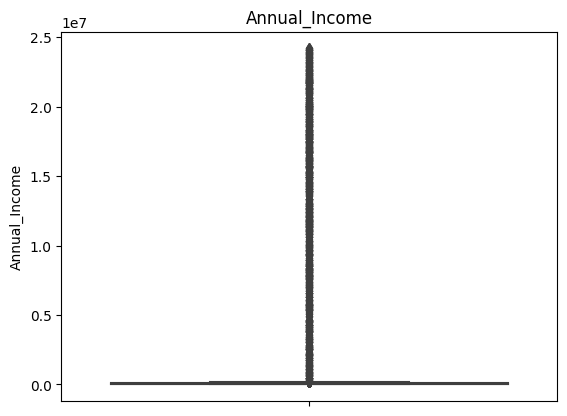

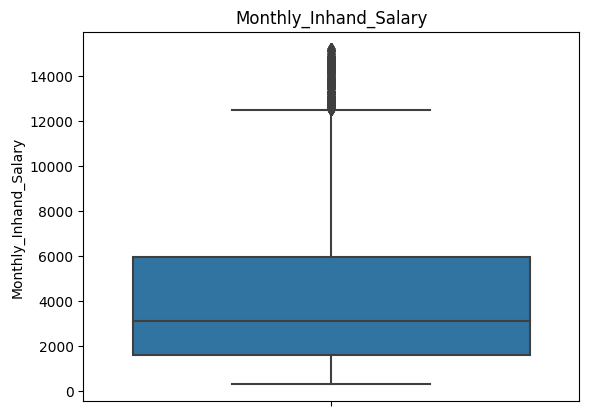

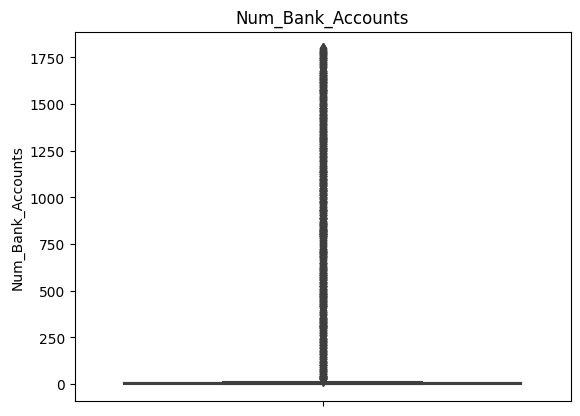

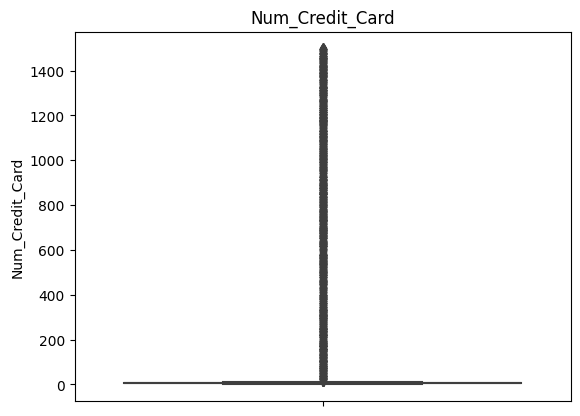

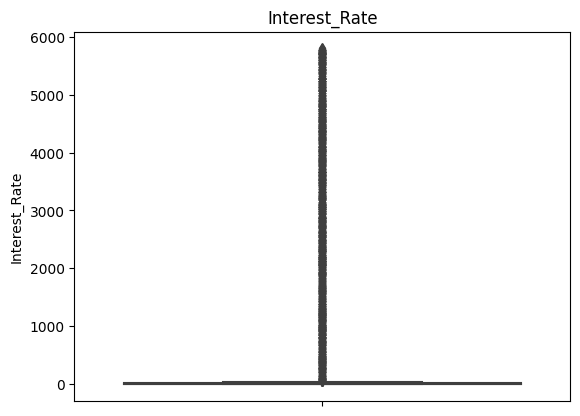

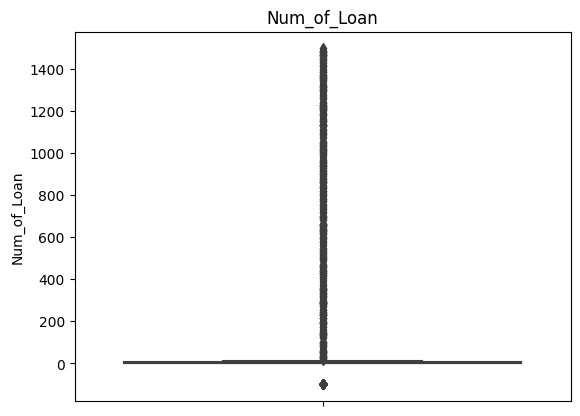

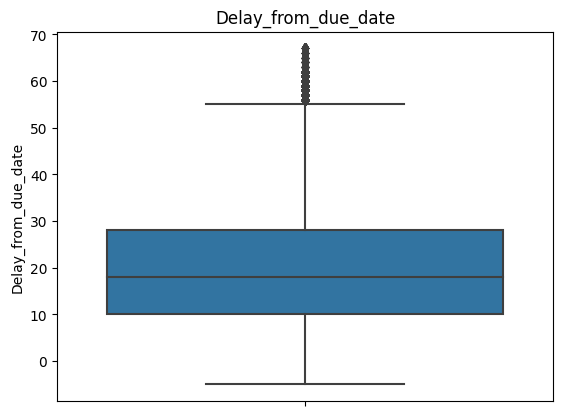

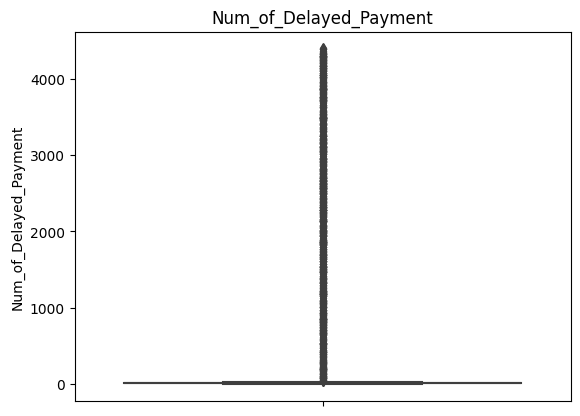

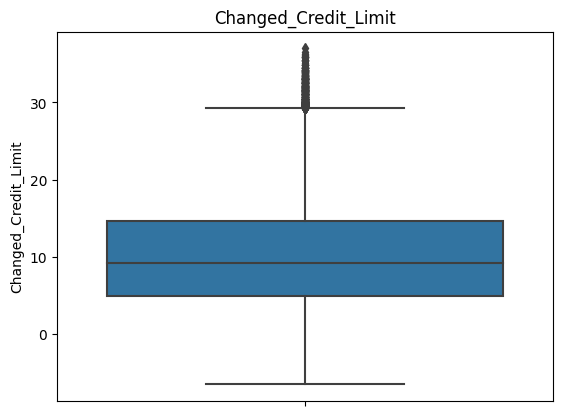

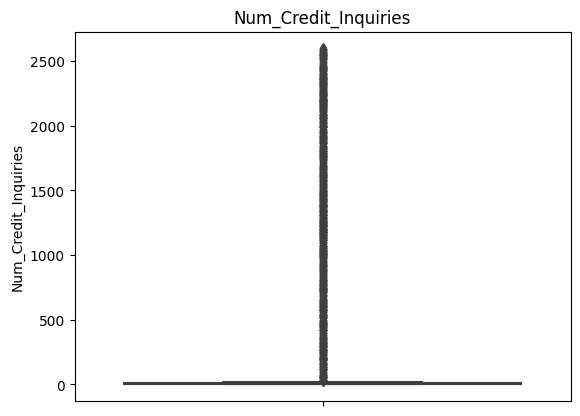

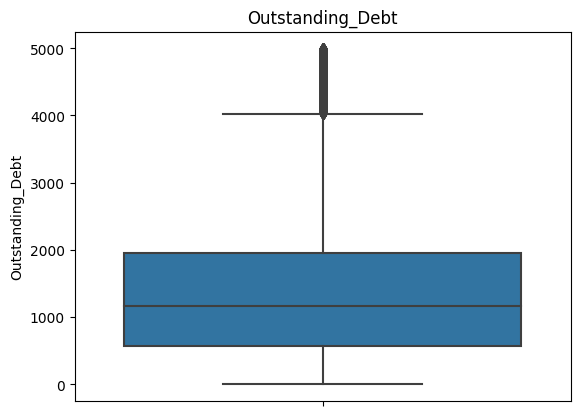

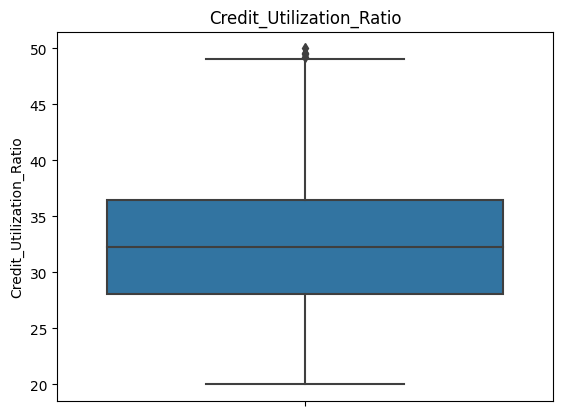

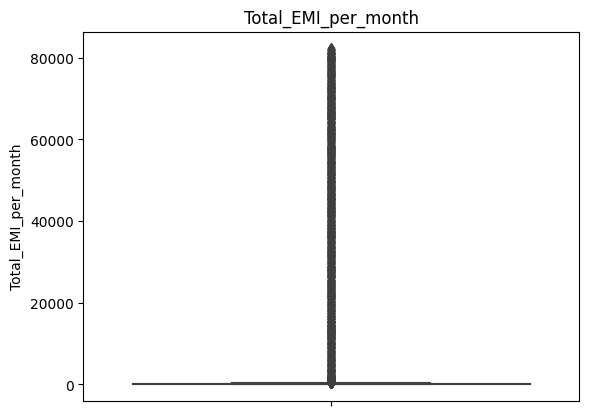

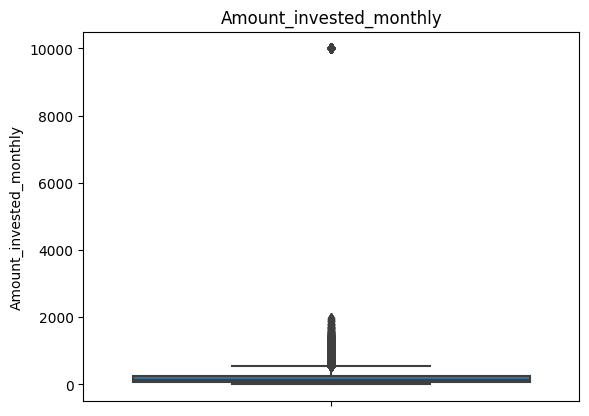

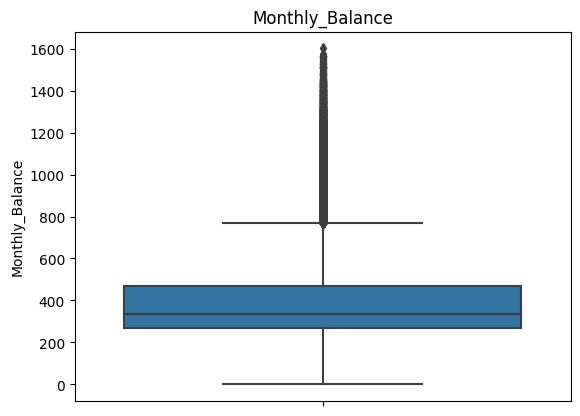

In [ ]:
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        sns.boxplot(y=df[column])
        plt.title(column)
        plt.show()


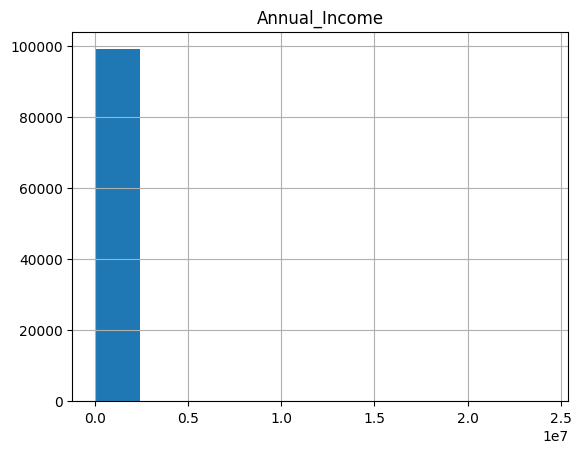

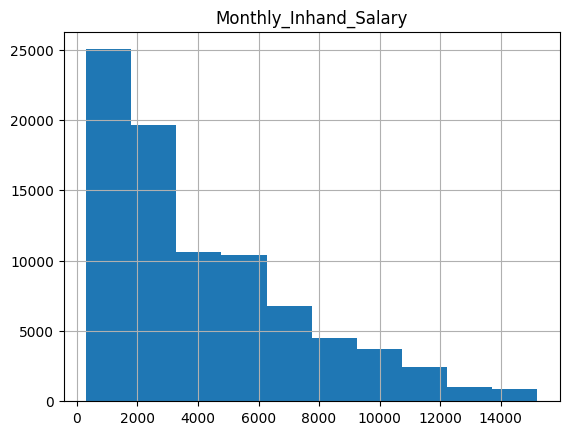

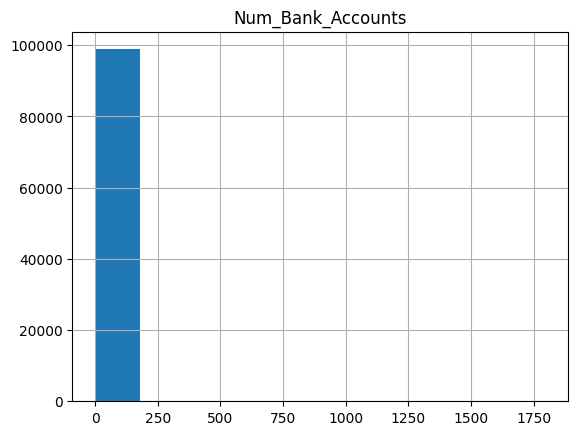

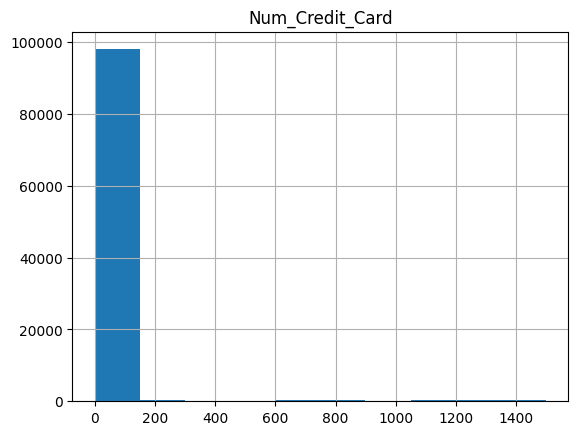

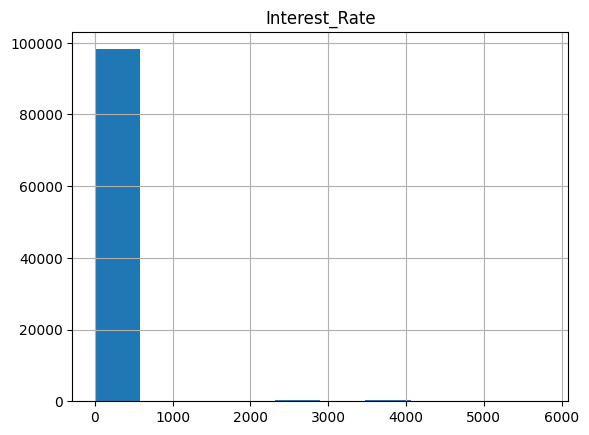

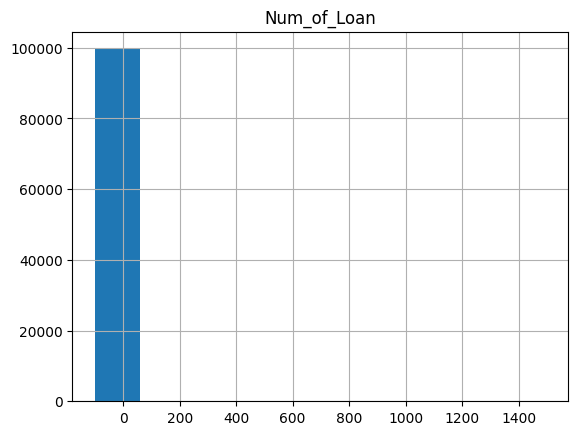

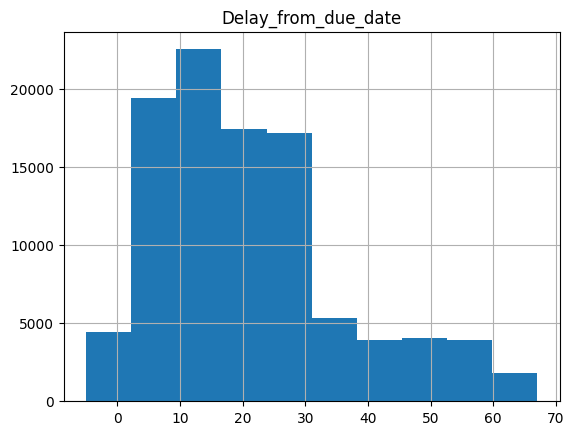

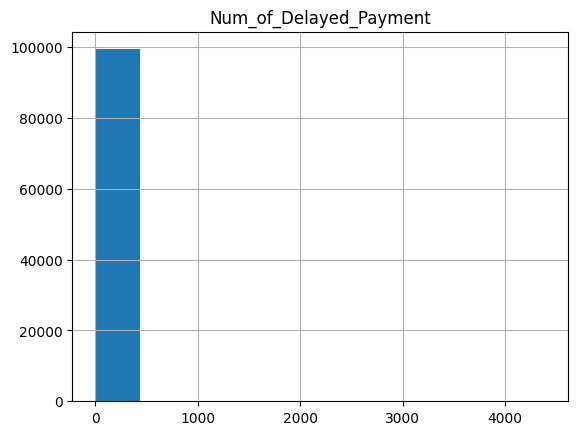

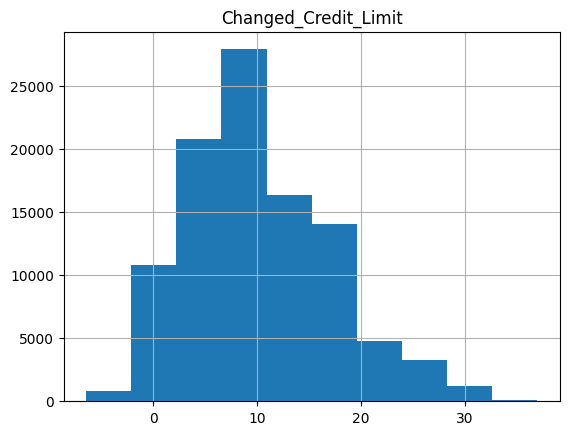

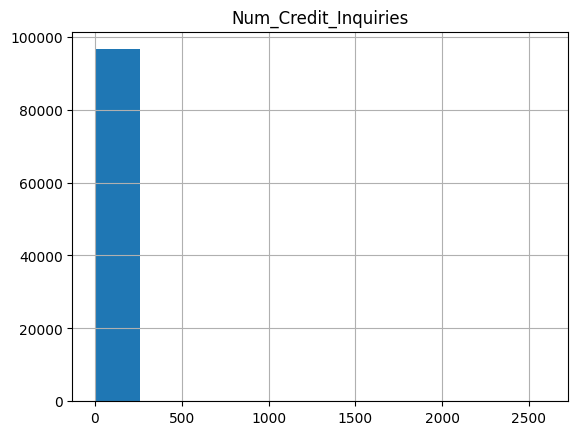

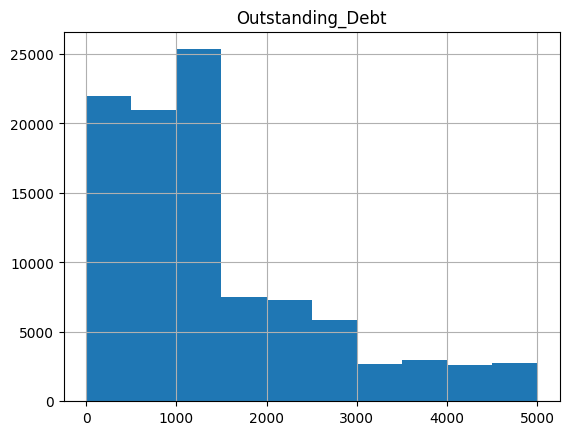

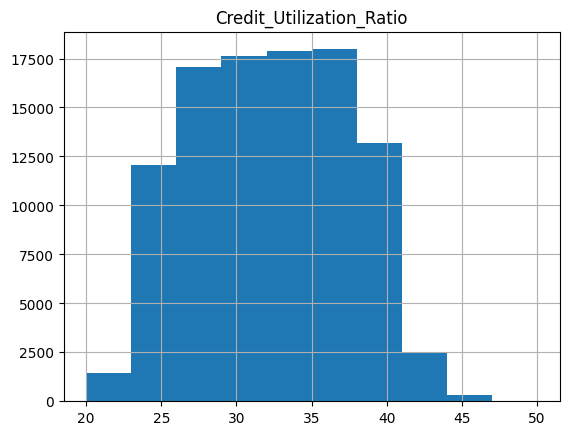

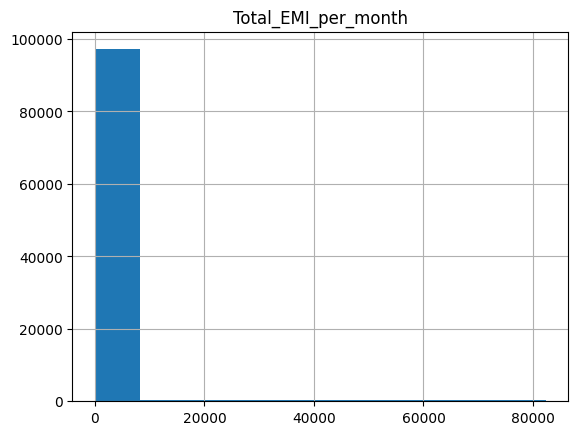

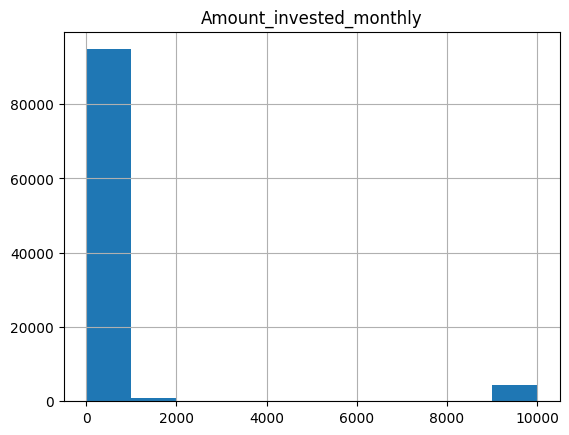

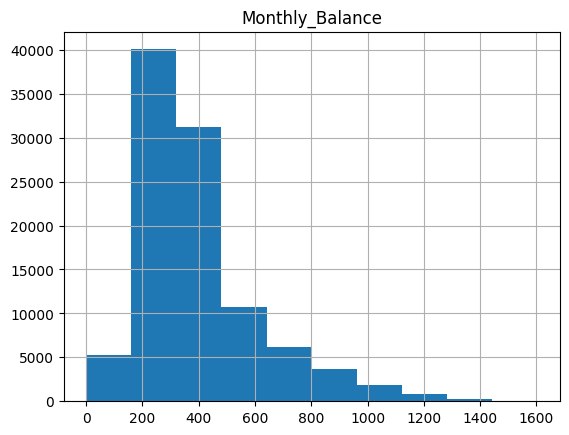

In [ ]:
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        plt.figure()
        plt.title(column)
        df[column].hist()
        plt.show()

array([[<Axes: title={'center': 'Annual_Income'}>,
        <Axes: title={'center': 'Monthly_Inhand_Salary'}>,
        <Axes: title={'center': 'Num_Bank_Accounts'}>,
        <Axes: title={'center': 'Num_Credit_Card'}>],
       [<Axes: title={'center': 'Interest_Rate'}>,
        <Axes: title={'center': 'Num_of_Loan'}>,
        <Axes: title={'center': 'Delay_from_due_date'}>,
        <Axes: title={'center': 'Num_of_Delayed_Payment'}>],
       [<Axes: title={'center': 'Changed_Credit_Limit'}>,
        <Axes: title={'center': 'Num_Credit_Inquiries'}>,
        <Axes: title={'center': 'Outstanding_Debt'}>,
        <Axes: title={'center': 'Credit_Utilization_Ratio'}>],
       [<Axes: title={'center': 'Total_EMI_per_month'}>,
        <Axes: title={'center': 'Amount_invested_monthly'}>,
        <Axes: title={'center': 'Monthly_Balance'}>, <Axes: >]],
      dtype=object)

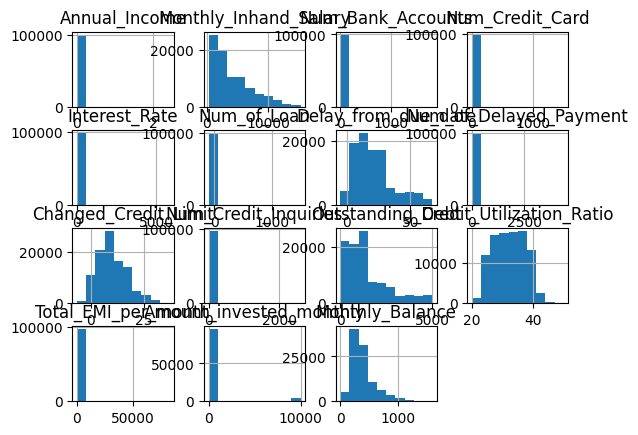

In [ ]:
df.hist()

<ipython-input-219-ca058e32875d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], hist=True, kde=True,


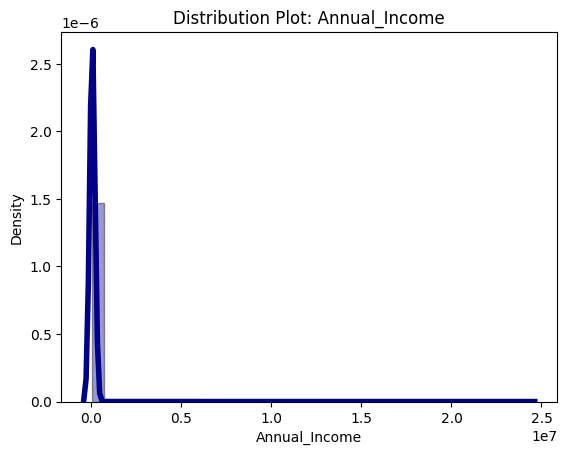

<ipython-input-219-ca058e32875d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], hist=True, kde=True,


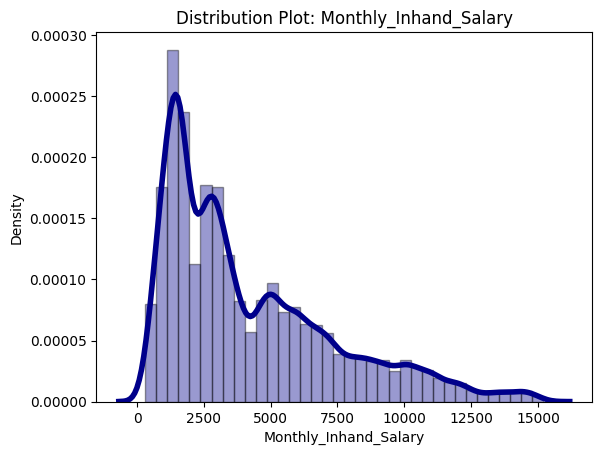

<ipython-input-219-ca058e32875d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], hist=True, kde=True,


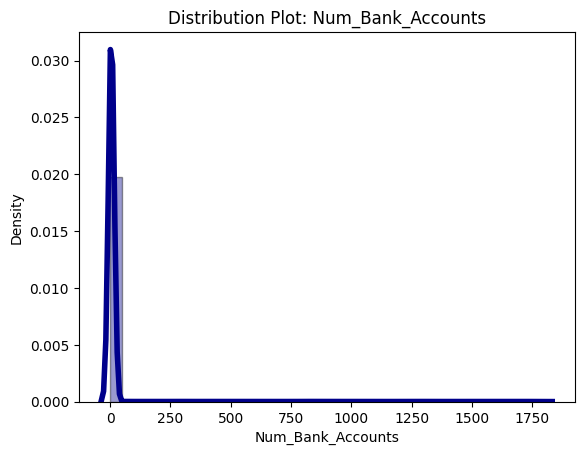

<ipython-input-219-ca058e32875d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], hist=True, kde=True,


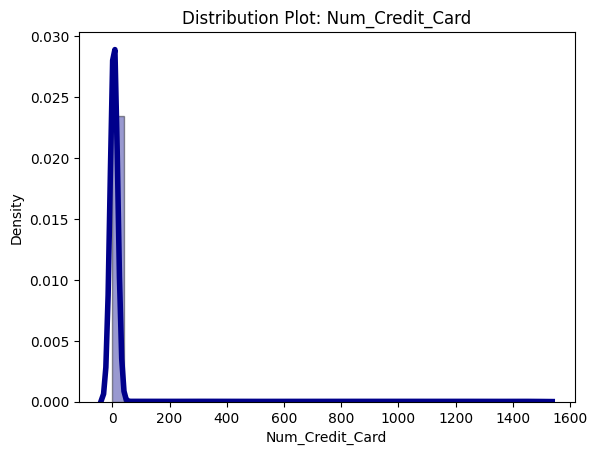

<ipython-input-219-ca058e32875d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], hist=True, kde=True,


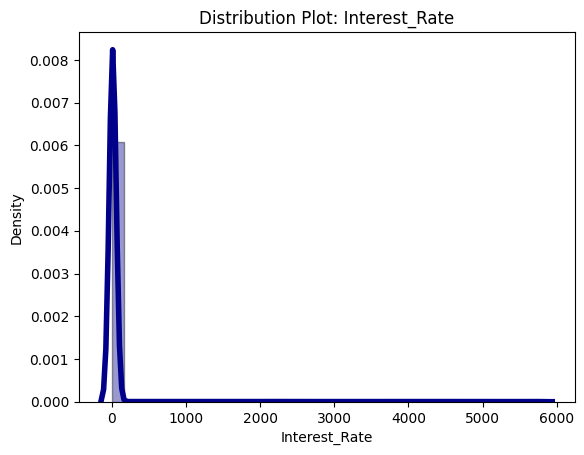

<ipython-input-219-ca058e32875d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], hist=True, kde=True,


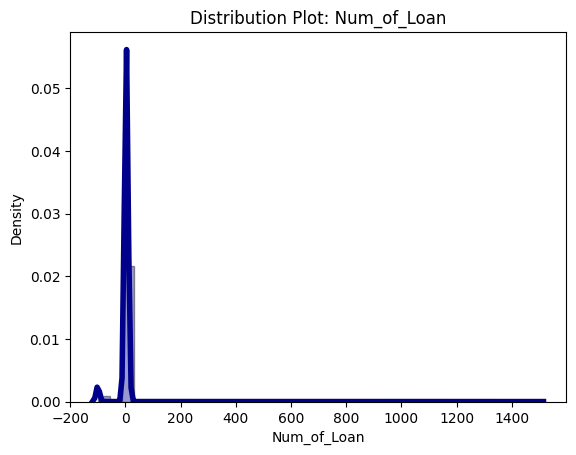

<ipython-input-219-ca058e32875d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], hist=True, kde=True,


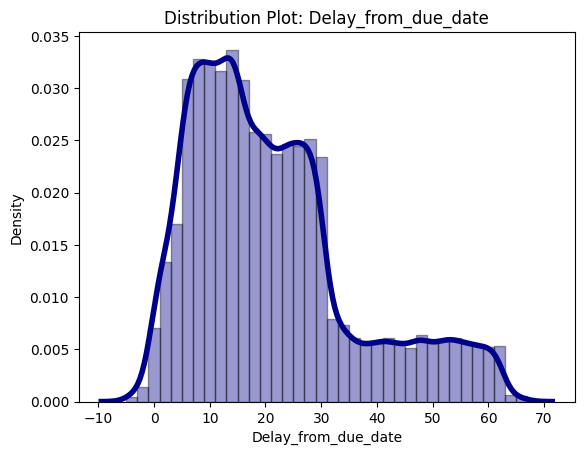

<ipython-input-219-ca058e32875d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], hist=True, kde=True,


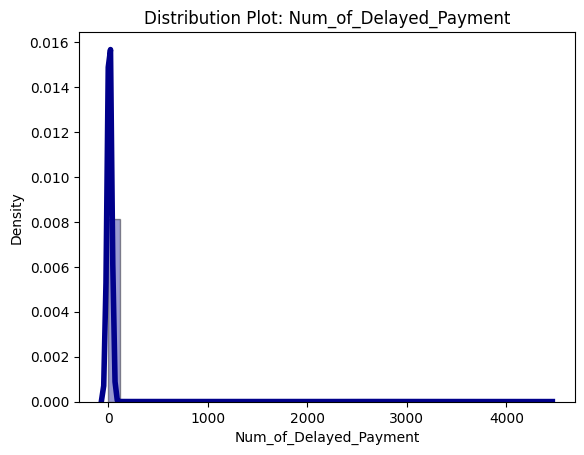

<ipython-input-219-ca058e32875d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], hist=True, kde=True,


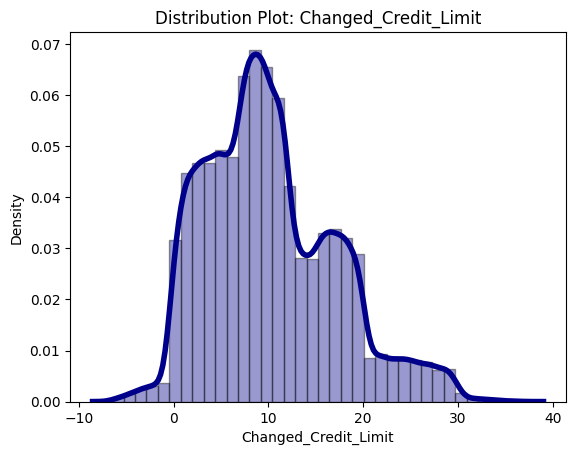

<ipython-input-219-ca058e32875d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], hist=True, kde=True,


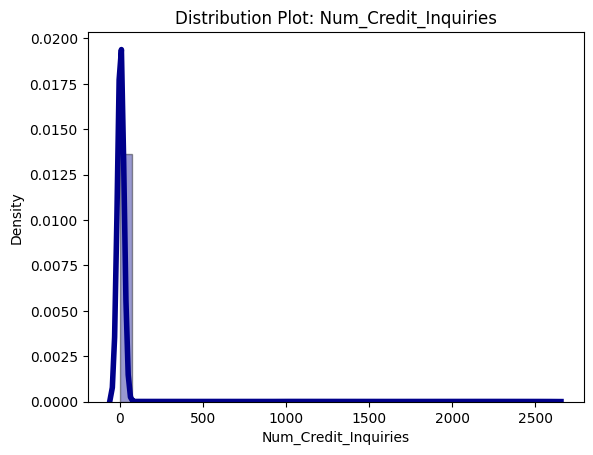

<ipython-input-219-ca058e32875d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], hist=True, kde=True,


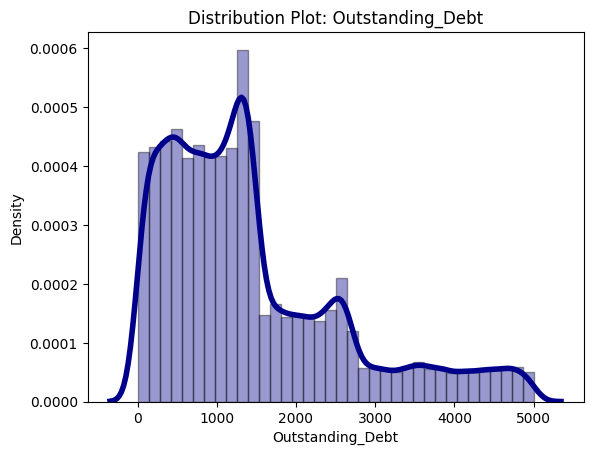

<ipython-input-219-ca058e32875d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], hist=True, kde=True,


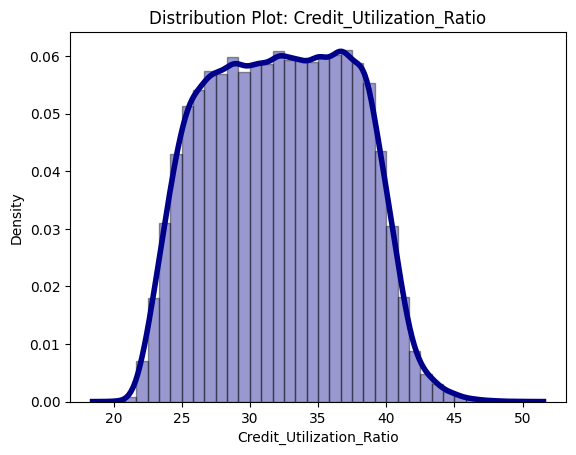

<ipython-input-219-ca058e32875d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], hist=True, kde=True,


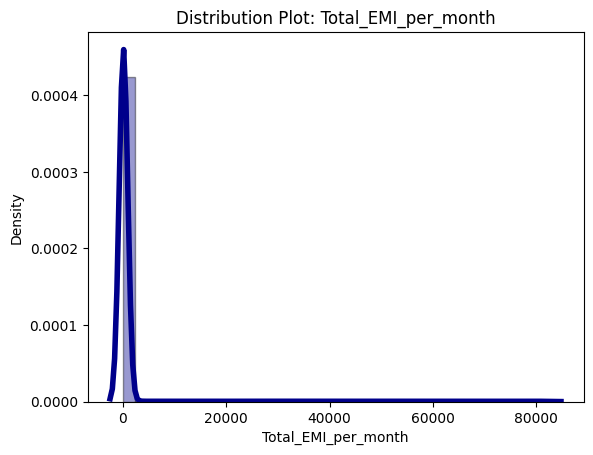

<ipython-input-219-ca058e32875d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], hist=True, kde=True,


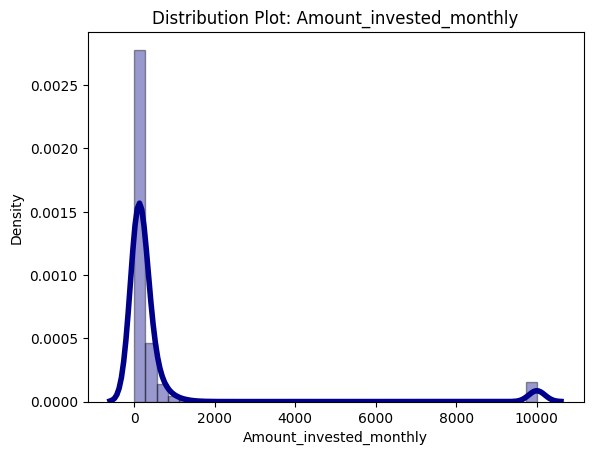

<ipython-input-219-ca058e32875d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], hist=True, kde=True,


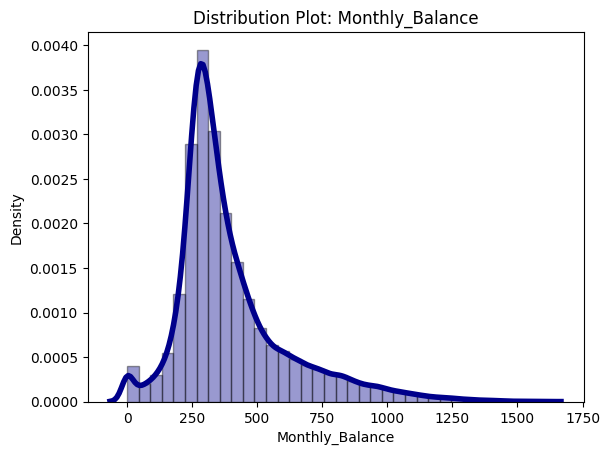

In [ ]:
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        plt.figure()
        sns.distplot(df[column], hist=True, kde=True,
                     bins=int(180/5), color='darkblue',
                     hist_kws={'edgecolor': 'black'},
                     kde_kws={'linewidth': 4})
        plt.title(f'Distribution Plot: {column}')
        plt.show()

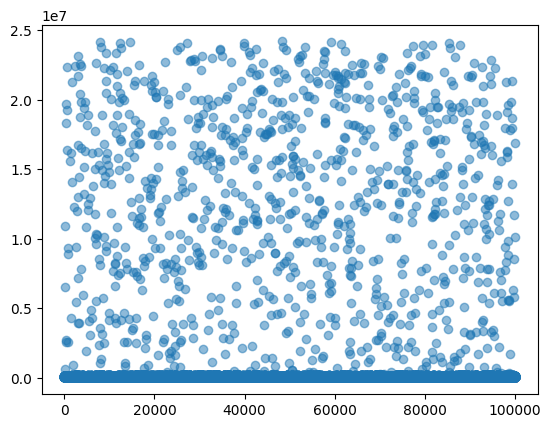

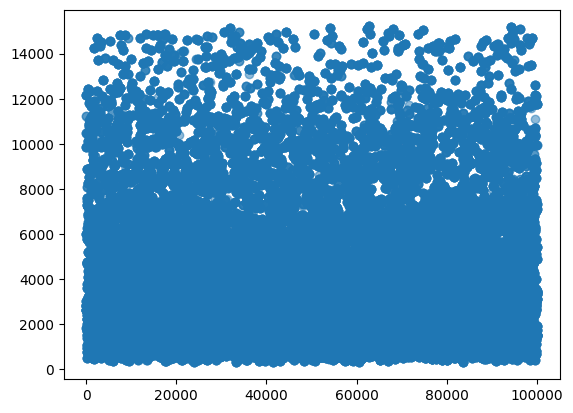

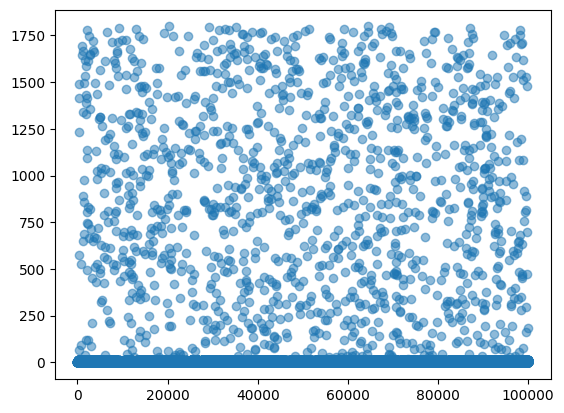

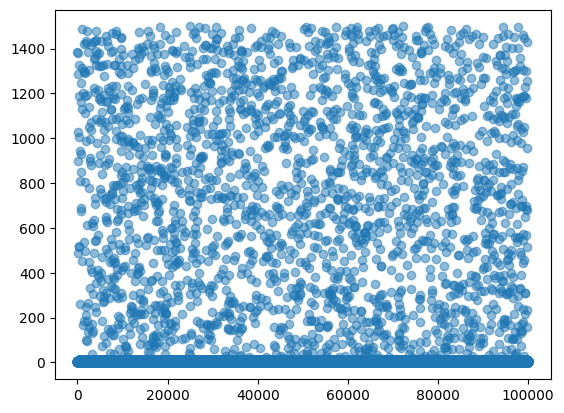

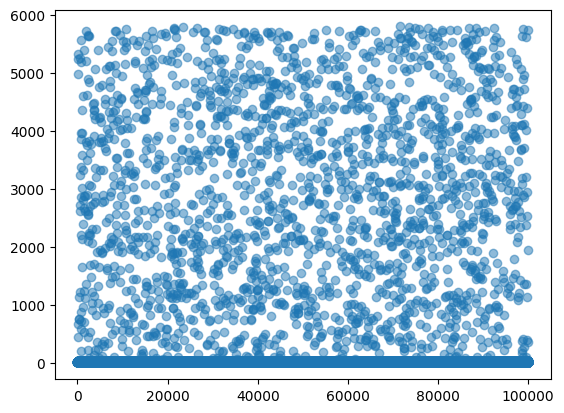

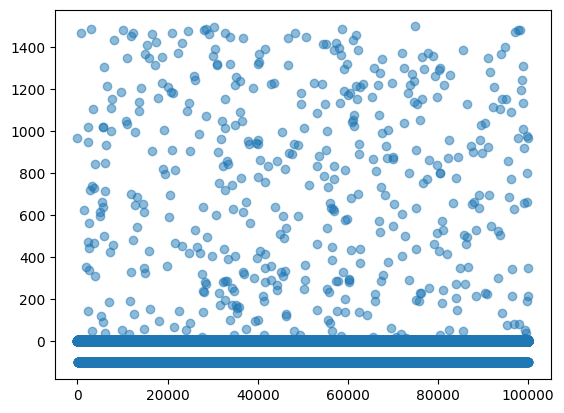

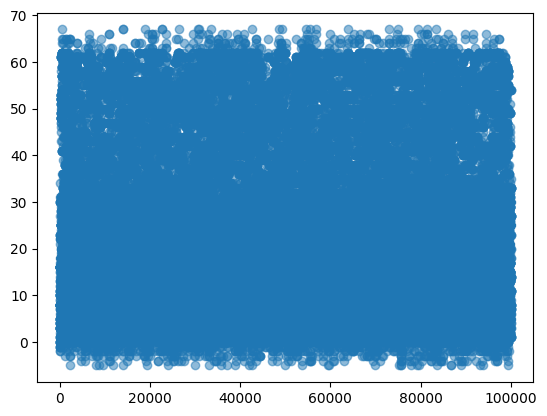

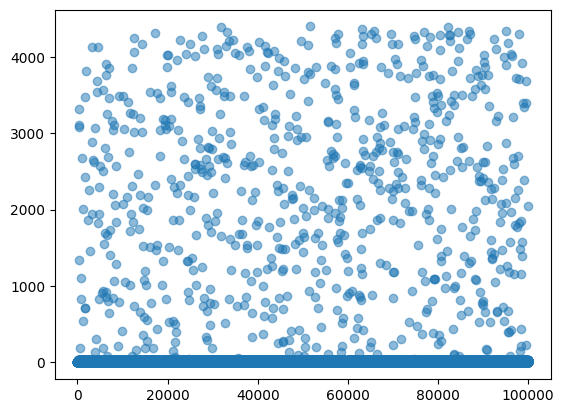

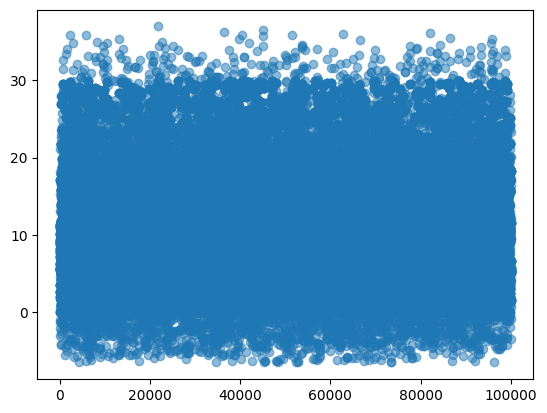

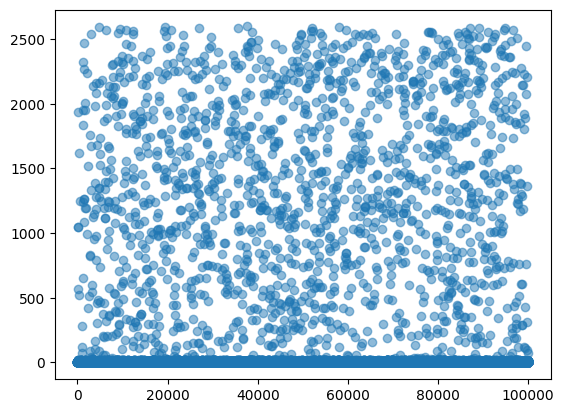

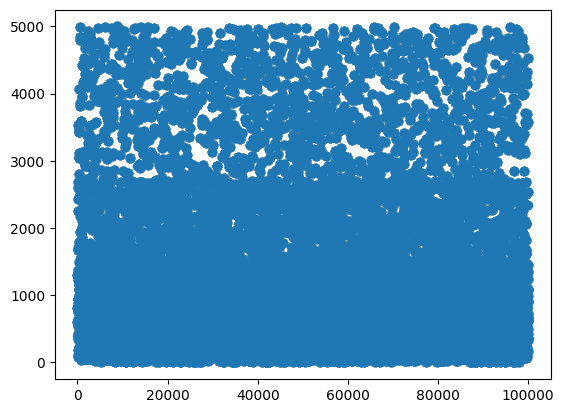

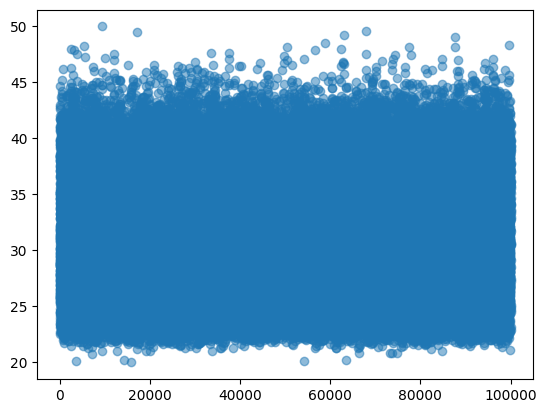

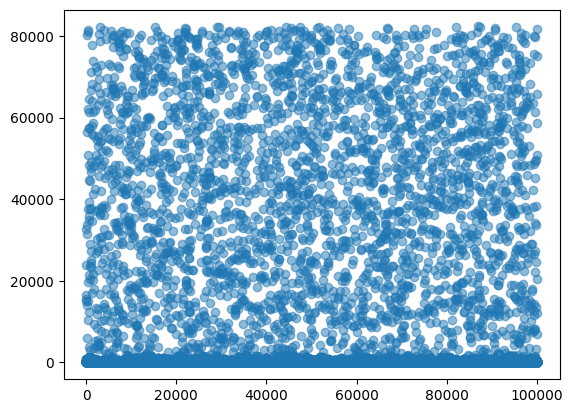

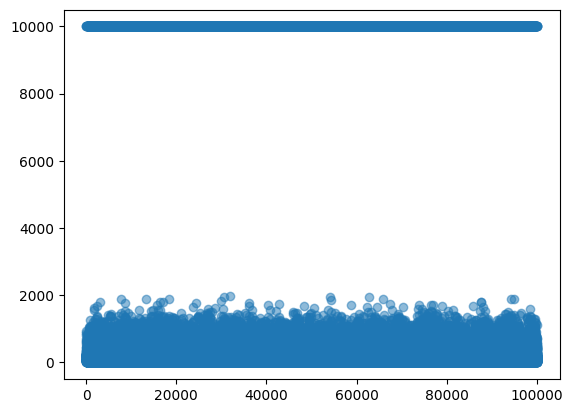

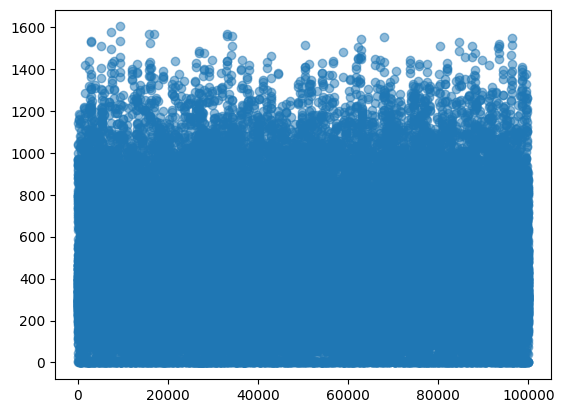

In [ ]:
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        plt.scatter(range(len(df[column])), df[column], label=column, alpha=0.5)
        plt.show()


###1.3. Izvršiti odgovarajuće transformacije podataka, te uklanjanje nepodobnih vrijednosti da bi
dobili podatke koji su spremni za korištenje u većini metoda klasifikacije.

In [ ]:
numeric_columns = df.select_dtypes(include='number')

In [ ]:
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1
outliers = ((numeric_columns < (Q1 - 1.5 * IQR)) | (numeric_columns > (Q3 + 1.5 * IQR))).any(axis=1)


In [ ]:
df_no_outliers = df[~outliers]

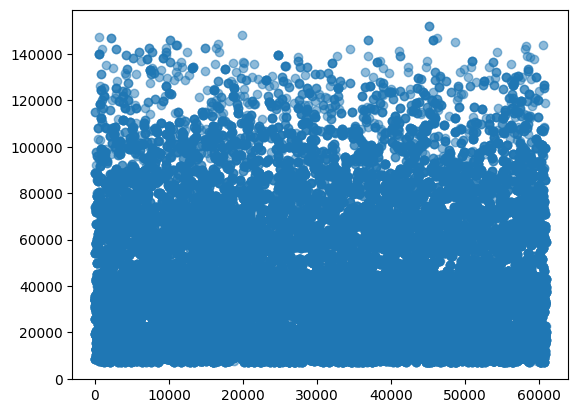

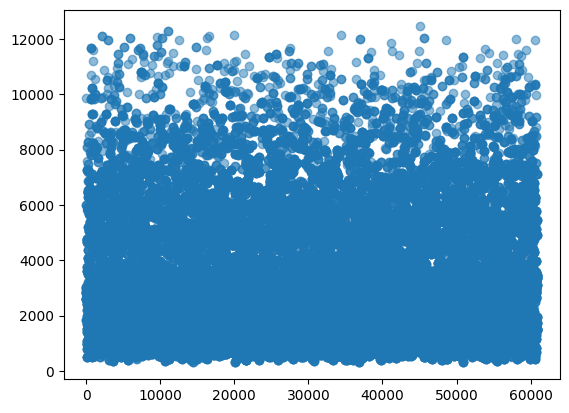

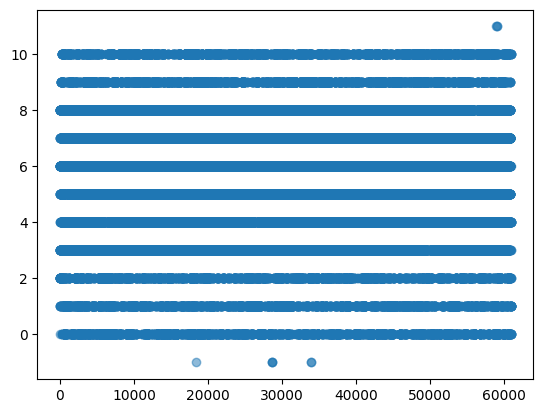

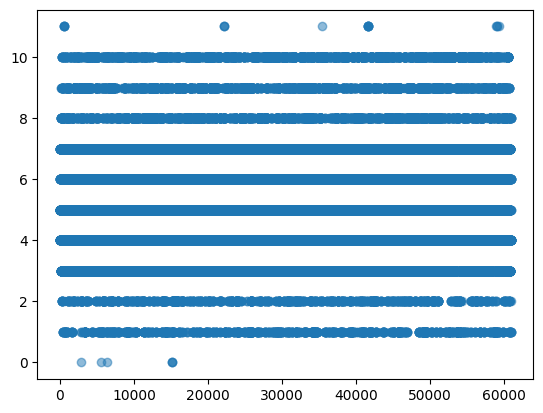

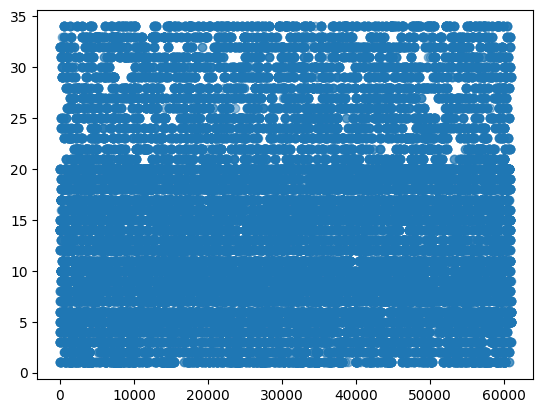

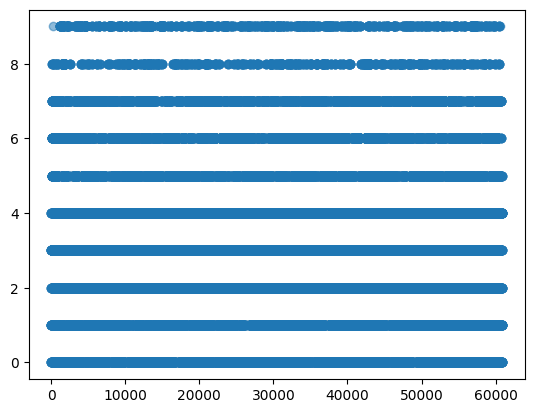

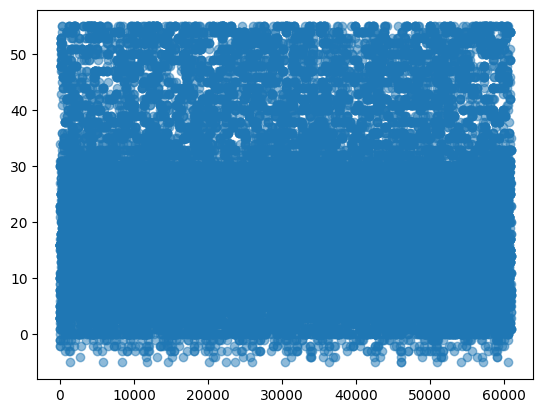

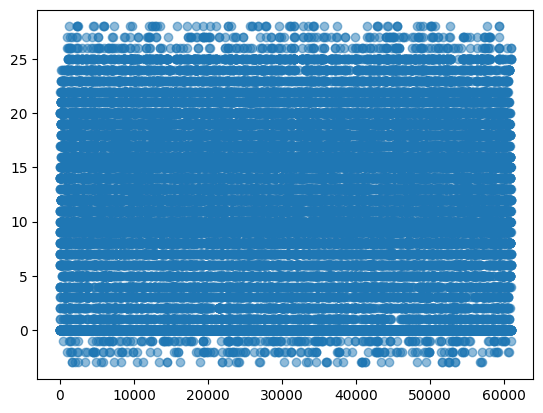

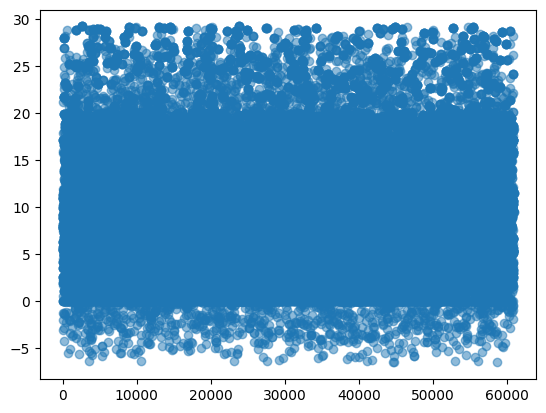

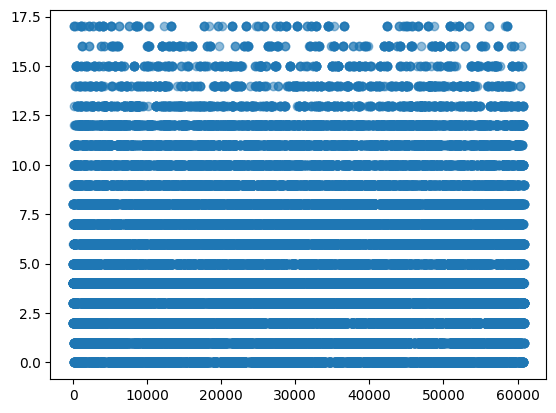

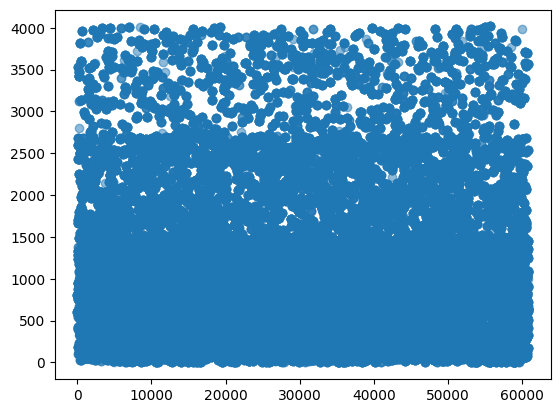

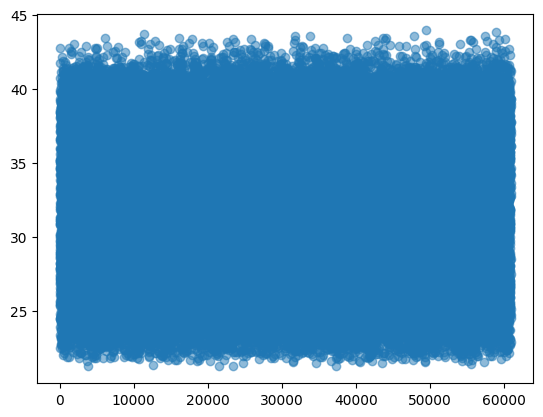

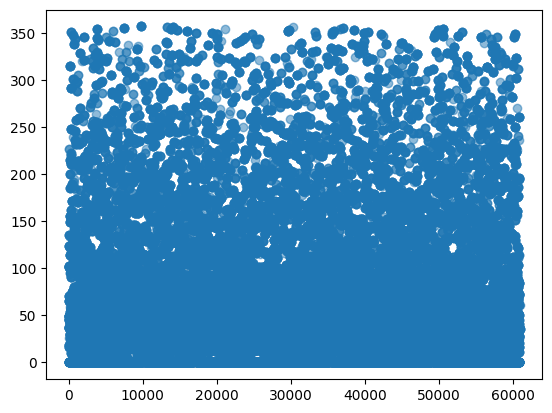

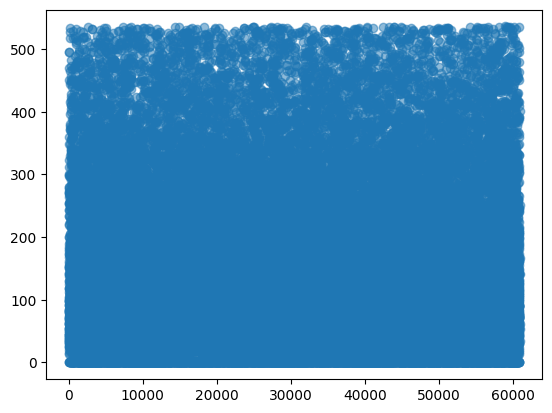

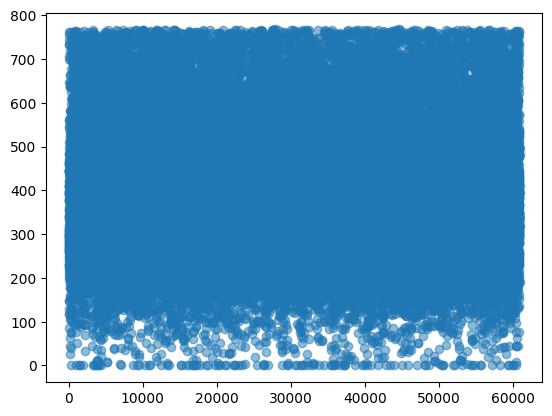

In [ ]:
for column in df_no_outliers.columns:
    if pd.api.types.is_numeric_dtype(df_no_outliers[column]):
        plt.scatter(range(len(df_no_outliers[column])), df_no_outliers[column], label=column, alpha=0.5)
        plt.show()

In [ ]:
z_scores = (numeric_columns - numeric_columns.mean()) / numeric_columns.std()

In [ ]:
outliers = (z_scores.abs() > 3).any(axis=1) #samnjivanjem granice u ifu se oduzima veći broj outliera

In [ ]:
df_no_outliers = df[~outliers]

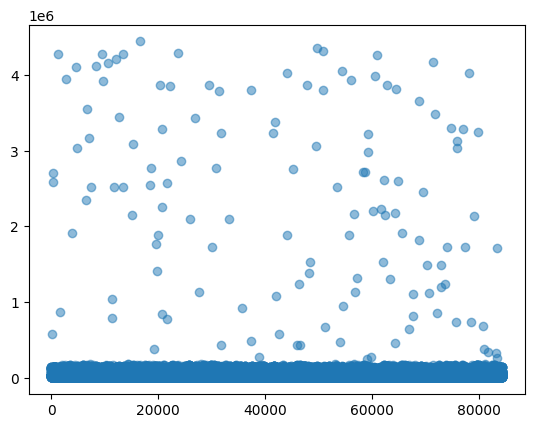

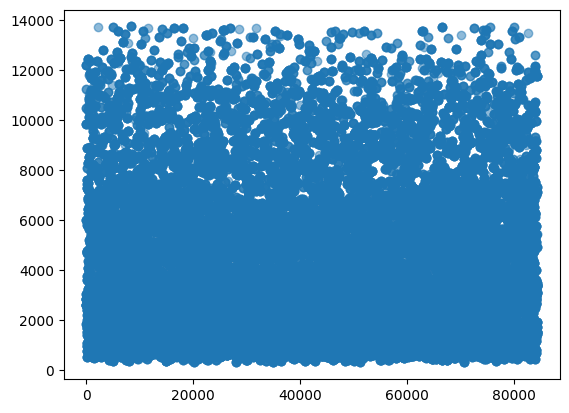

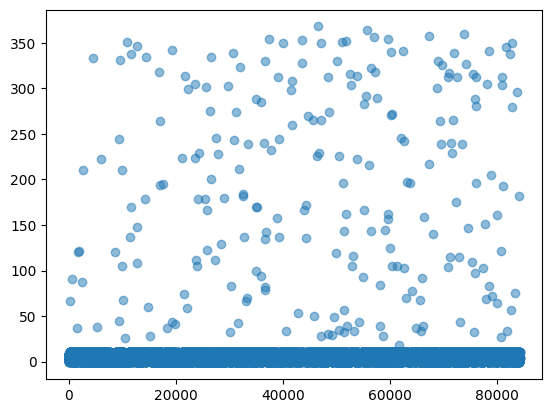

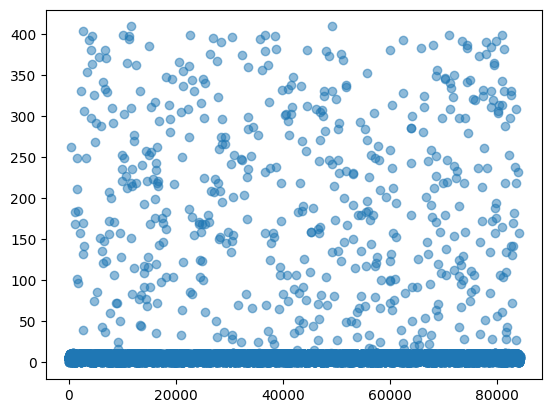

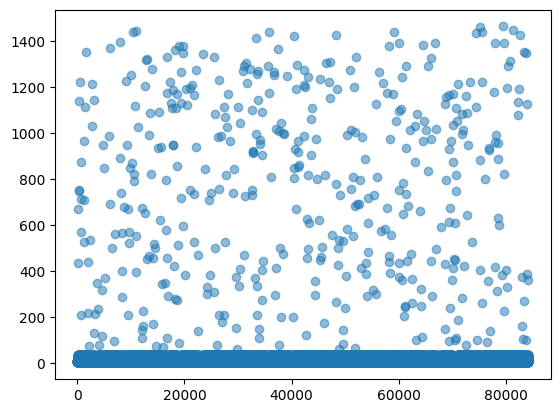

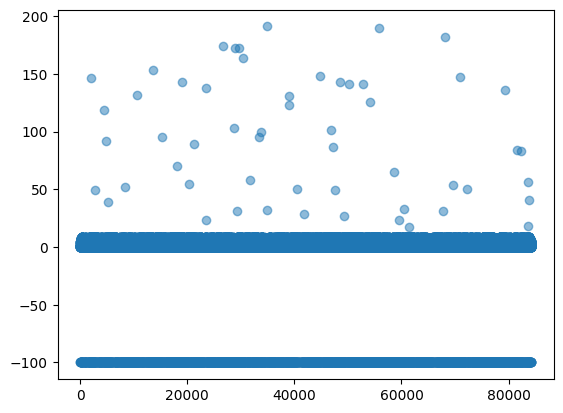

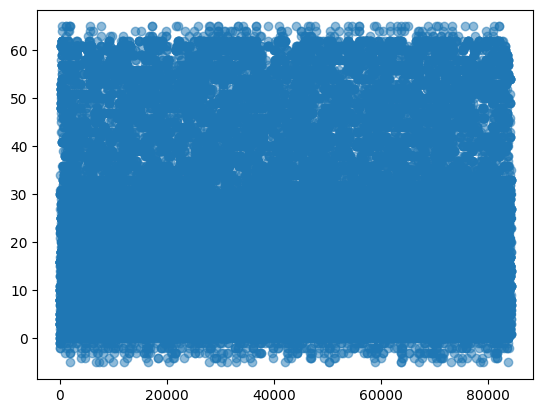

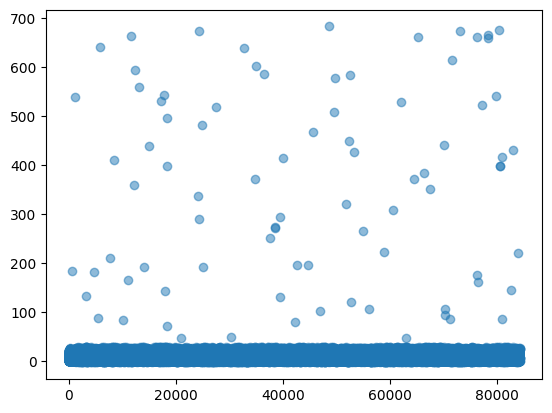

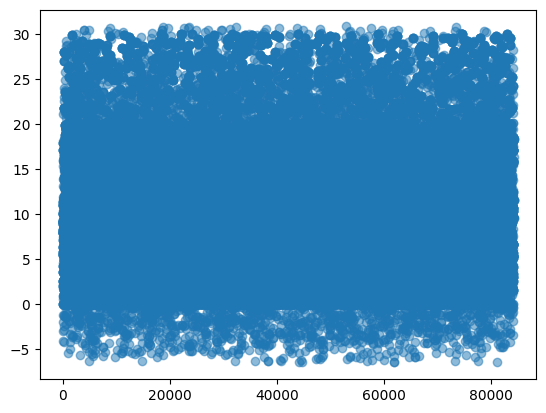

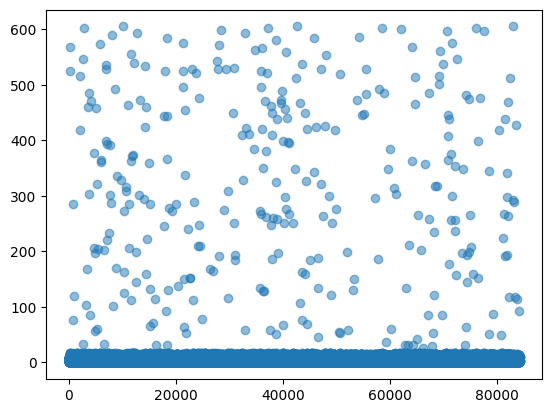

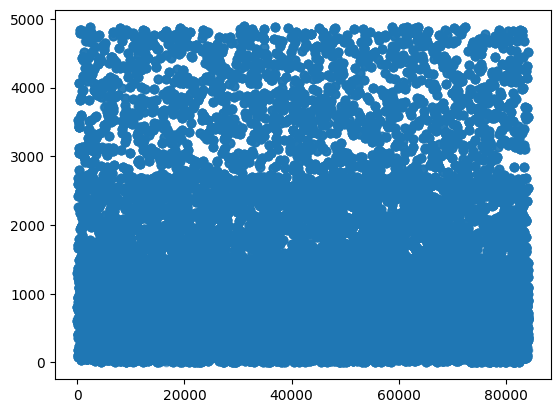

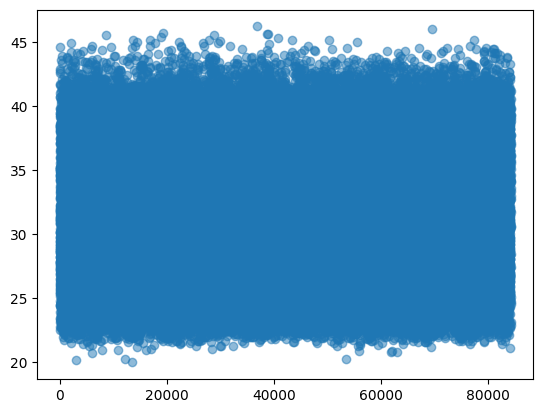

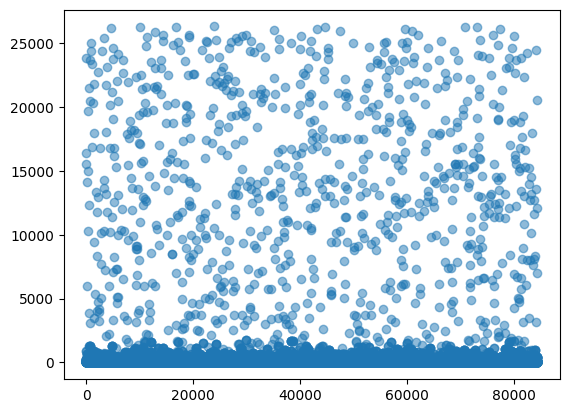

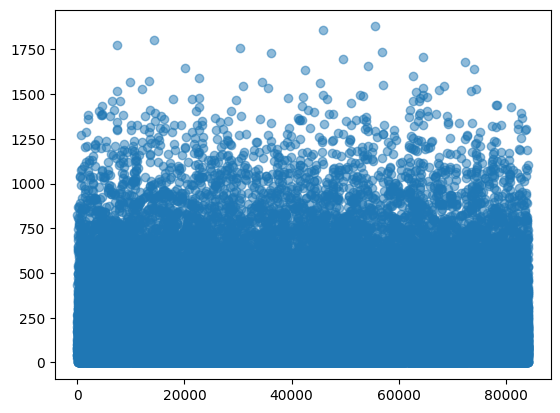

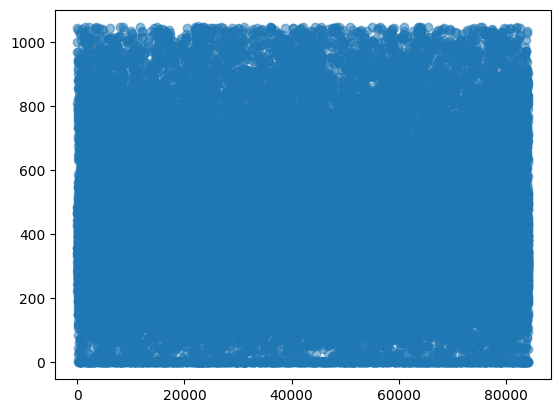

In [ ]:
for column in df_no_outliers.columns[3:]:
    if pd.api.types.is_numeric_dtype(df_no_outliers[column]):
        plt.scatter(range(len(df_no_outliers[column])), df_no_outliers[column], label=column, alpha=0.5)
        plt.show()